In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib.image import imread
from tqdm.notebook import tqdm_notebook as tqdm
import os

In [4]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# insearting datapath
data_dir = "C:/Users/16399/Downloads/crypto/model"

In [6]:
os.listdir(data_dir)

['test', 'train']

In [7]:
# number of class
train_dir = data_dir+"/train"
os.listdir(train_dir)

['fake', 'real']

In [8]:
# finding classes in testing set
test_dir = data_dir+"/test"
os.listdir(test_dir)

['fake', 'real']

In [9]:
# number of images in training dataset for fake class
len(os.listdir(train_dir+"/fake"))

960

In [10]:
# number of images in training dataset for real class
len(os.listdir(train_dir+"/real"))

1081

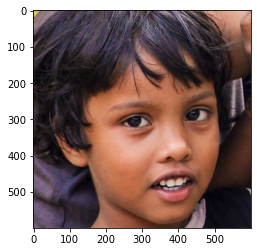

In [11]:
#observing the training dataset for real class
real_sample = imread(train_dir+"/real"+"/real_00001.jpg")
plt.imshow(real_sample)

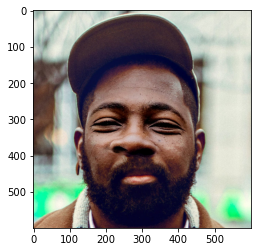

In [12]:
# observing the training dataset for fake class
fake_sample = imread(train_dir+"/fake"+"/easy_1_1110.jpg")
plt.imshow(fake_sample)

In [13]:
# observing shape of fake faces images
fake_sample.shape

(600, 600, 3)

In [14]:
# observing shape of real faces images
real_sample.shape

(600, 600, 3)

In [15]:
# preparing for data augmentation
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False, 
    vertical_flip=False,
    rescale=1/255,
)

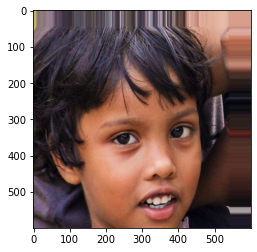

In [16]:
# observing the output of generator
plt.imshow(generator.random_transform(real_sample))

In [17]:
generator.flow_from_directory(test_dir)
generator.flow_from_directory(train_dir)

Found 2017 images belonging to 2 classes.
Found 2041 images belonging to 2 classes.


In [18]:
# augmentation of training images
train_generator = generator.flow_from_directory (
    train_dir,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 2041 images belonging to 2 classes.


In [19]:
# augmentation of testing images
test_generator = generator.flow_from_directory (
    test_dir,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 2017 images belonging to 2 classes.


In [24]:
# importing pre trained  MNet
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(96,96,3))

In [25]:
# modifying (adding) layers of MNet
tf.keras.backend.clear_session()
model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    #Dense(128, activation = "relu"),
                    #Dropout(0.1),
                    Dense(32, activation = "relu"),
                    Dropout(0.3),
                    Dense(2, activation = "softmax")])
model.compile(loss = "categorical_crossentropy", optimizer = Adam(lr=0.001), metrics = ["accuracy"])

In [26]:
# training model
model.fit_generator(train_generator, validation_data=test_generator, epochs=250)

C:\Users\16399\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/250
64/64 [==============================] - 401s 6s/step - loss: 1.3270 - accuracy: 0.5318 - val_loss: 4.5121 - val_accuracy: 0.5300
Epoch 2/250
64/64 [==============================] - 386s 6s/step - loss: 0.8335 - accuracy: 0.5799 - val_loss: 1.2097 - val_accuracy: 0.5300
Epoch 3/250
64/64 [==============================] - 415s 6s/step - loss: 0.7246 - accuracy: 0.5992 - val_loss: 3.2817 - val_accuracy: 0.5300
Epoch 4/250
64/64 [==============================] - 407s 6s/step - loss: 0.6208 - accuracy: 0.6749 - val_loss: 0.8033 - val_accuracy: 0.5533
Epoch 5/250
64/64 [==============================] - 395s 6s/step - loss: 0.5719 - accuracy: 0.7000 - val_loss: 0.9682 - val_accuracy: 0.5637
Epoch 6/250
64/64 [==============================] - 407s 6s/step - loss: 0.5535 - accuracy: 0.7406 - val_loss: 1.0025 - val_accuracy: 0.5885
Epoch 7/250
64/64 [==============================] - 399s 6s/step - loss: 0.5219 - accuracy: 0.7641 - val_loss: 0.8237 - val_accuracy: 0.6113
Epoch 

64/64 [==============================] - 366s 6s/step - loss: 0.0448 - accuracy: 0.9793 - val_loss: 5.2331 - val_accuracy: 0.6539
Epoch 116/250
64/64 [==============================] - 364s 6s/step - loss: 0.0748 - accuracy: 0.9783 - val_loss: 5.6426 - val_accuracy: 0.6168
Epoch 117/250
64/64 [==============================] - 364s 6s/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 6.3135 - val_accuracy: 0.5444
Epoch 118/250
64/64 [==============================] - 365s 6s/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 12.5186 - val_accuracy: 0.4794
Epoch 119/250
64/64 [==============================] - 364s 6s/step - loss: 0.0330 - accuracy: 0.9858 - val_loss: 10.6673 - val_accuracy: 0.4849
Epoch 120/250
64/64 [==============================] - 364s 6s/step - loss: 0.0327 - accuracy: 0.9891 - val_loss: 5.3277 - val_accuracy: 0.5419
Epoch 121/250
64/64 [==============================] - 364s 6s/step - loss: 0.0720 - accuracy: 0.9732 - val_loss: 2.9078 - val_accuracy: 0.7506
Epoc

Epoch 172/250
64/64 [==============================] - 368s 6s/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 4.9044 - val_accuracy: 0.5250
Epoch 173/250
64/64 [==============================] - 365s 6s/step - loss: 0.0337 - accuracy: 0.9872 - val_loss: 1.4744 - val_accuracy: 0.7437
Epoch 174/250
64/64 [==============================] - 367s 6s/step - loss: 0.0194 - accuracy: 0.9948 - val_loss: 3.7207 - val_accuracy: 0.6753
Epoch 175/250
64/64 [==============================] - 368s 6s/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.6999 - val_accuracy: 0.8989
Epoch 176/250
64/64 [==============================] - 366s 6s/step - loss: 0.0286 - accuracy: 0.9924 - val_loss: 4.0184 - val_accuracy: 0.5796
Epoch 177/250
64/64 [==============================] - 366s 6s/step - loss: 0.0722 - accuracy: 0.9786 - val_loss: 0.9600 - val_accuracy: 0.7635
Epoch 178/250
64/64 [==============================] - 366s 6s/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 1.6170 - val_accuracy:

Epoch 229/250
64/64 [==============================] - 367s 6s/step - loss: 0.0105 - accuracy: 0.9992 - val_loss: 4.0984 - val_accuracy: 0.6465
Epoch 230/250
64/64 [==============================] - 368s 6s/step - loss: 0.0089 - accuracy: 0.9959 - val_loss: 2.9030 - val_accuracy: 0.7115
Epoch 231/250
64/64 [==============================] - 366s 6s/step - loss: 0.0060 - accuracy: 0.9971 - val_loss: 2.9957 - val_accuracy: 0.6832
Epoch 232/250
64/64 [==============================] - 368s 6s/step - loss: 0.0301 - accuracy: 0.9888 - val_loss: 4.9619 - val_accuracy: 0.6187
Epoch 233/250
64/64 [==============================] - 367s 6s/step - loss: 0.0308 - accuracy: 0.9927 - val_loss: 4.2412 - val_accuracy: 0.5974
Epoch 234/250
64/64 [==============================] - 367s 6s/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 2.2397 - val_accuracy: 0.7110
Epoch 235/250
64/64 [==============================] - 366s 6s/step - loss: 0.0233 - accuracy: 0.9917 - val_loss: 2.9364 - val_accuracy:

In [27]:
model.summary()
model.save("new7.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [28]:
model.metrics_names

['loss', 'accuracy']

<AxesSubplot:>

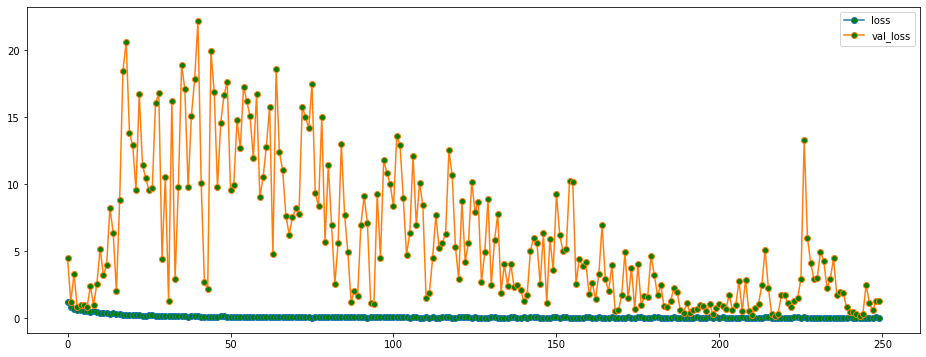

In [29]:
# plotting the loss
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<AxesSubplot:>

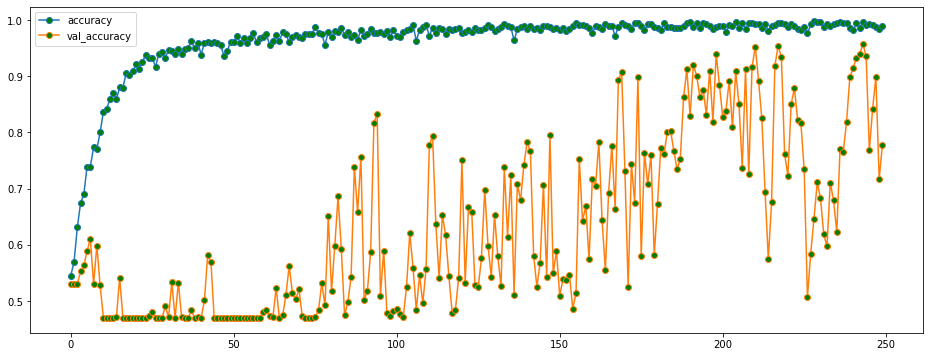

In [30]:
# plotting the accuracy
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

In [31]:
predictions = model.predict(test_generator)

In [32]:
pred_labels = np.argmax(predictions, axis = 1)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
# showing label of fake and real images
test_generator.class_indices

{'fake': 0, 'real': 1}

In [34]:
print(classification_report(test_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81       948
           1       0.99      0.61      0.75      1069

    accuracy                           0.79      2017
   macro avg       0.84      0.80      0.78      2017
weighted avg       0.85      0.79      0.78      2017

